In [5]:
# Importing desired modles
import pandas as pd
import numpy as np
from numpy import inf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading all the three rawdata files 
rawdata = pd.read_csv("Train.csv")
traveldata = pd.read_csv("Train_Vehicletravellingdata.csv", index_col= None)
weatherdata = pd.read_csv("Train_WeatherData.csv")

In [7]:
# Understanding the data dimensions
print("The rawdata has {} rows and  {} columns".format(rawdata.shape[0], rawdata.shape[1]))
print("The traveldata has {} rows and  {} columns".format(traveldata.shape[0], traveldata.shape[1]))
print("The weatherdata has {} rows and  {} columns".format(weatherdata.shape[0], weatherdata.shape[1]))

The rawdata has 12994 rows and  5 columns
The traveldata has 162566 rows and  10 columns
The weatherdata has 162566 rows and  9 columns


In [414]:
# Exploring rawdata further
rawdata.head()

,ID,V2,V5,V6,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


The above dataset which has five variables Driving Style is the one which we wish to predict. The ID variable is a unique variable and is going to be the key variable in concatinating this dataset with the other two datasets. The other variables are explained below:

- V2: Length of vehicle in cm
- V5: weight of vehicle in kg
- V6: Number of axles

We will use this information and update the column names.

2    49.4
3    29.2
1    21.3
Name: DrivingStyle, dtype: float64

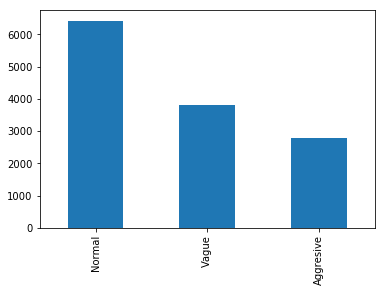

In [415]:
# Upadting the column names 
rawdata.columns = ['ID', 'VehicleLength(cm)', 'VehicleWeight(kg)', 'NumAxles', 'DrivingStyle']

# Barplot showcasing the frequency chart for Driving Style
rawdata['DrivingStyle'].value_counts().plot('bar').set_xticklabels( ('Normal', 'Vague','Aggresive') )

# Frequency table 
round(rawdata['DrivingStyle'].value_counts()/rawdata.shape[0] * 100, 1)

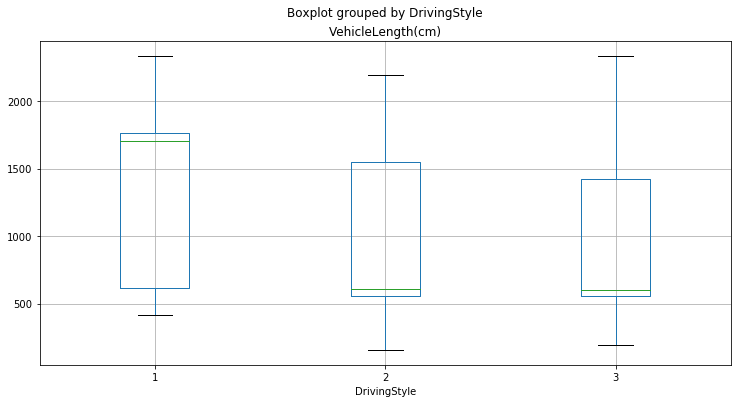

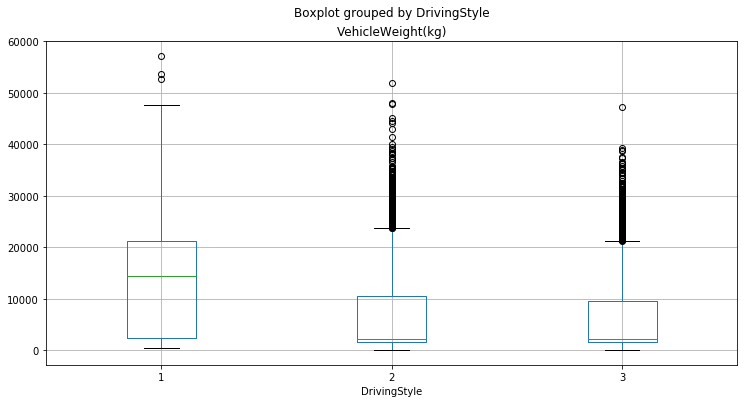

In [29]:
# Checking the distribution of vehicle length and weight across different driving styles. 
rawdata.boxplot(column =  ["VehicleLength(cm)"], by = "DrivingStyle", figsize=(12, 6))
rawdata.boxplot(column =  ["VehicleWeight(kg)"], by = "DrivingStyle", figsize=(12, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDA168FDA0>,
      dtype=object)

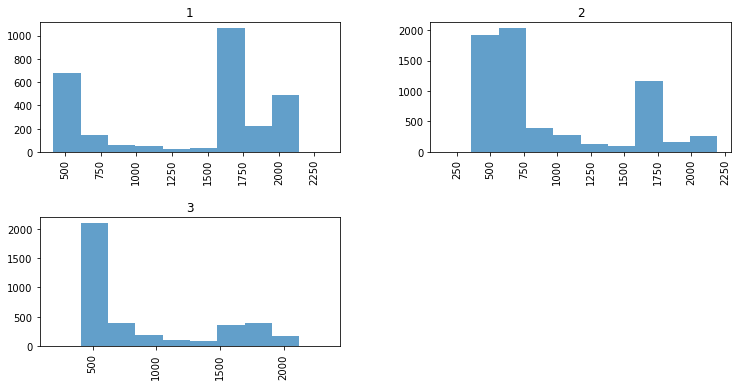

In [33]:
rawdata['VehicleLength(cm)'].hist(by=rawdata['DrivingStyle'], figsize=[12,6], alpha =.7)

In [54]:
# Creating a bunch of new variables form the existing variables in traveldata
unique_id = traveldata['ID'].unique()
pd.to_datetime(traveldata['V1'])

ID = []
SwitchCount = []
TotalJourneyTime = []
RateOfSwitch = []
AvgSpeed = []
MaxSpeed = []

AvgSpeedPrecedingVehicle = []
MaxSpeedPrecedingVehicle = []

AvgTimeGapPreceding =[]
MaxTimeGapPreceding =[]
MinTimeGapPreceding =[]
MedianTimeGapPreceding =[]

AvgLengthvehiclePreceding =[]
MaxLengthvehiclePreceding =[]
MinLengthvehiclePreceding =[]
MedianLengthvehiclePreceding =[]

AvgWeightvehiclePreceding =[]
MaxWeightvehiclePreceding =[]
MinWeightvehiclePreceding =[]
MedianWeightvehiclePreceding =[]

RoadCondition = []

for i in unique_id:
    ID.append(i)
    dfTemp = traveldata[traveldata.ID == i]
    
    JourneyTime = pd.to_datetime(dfTemp.V1.iloc[dfTemp.shape[0]-1]) - pd.to_datetime(dfTemp.V1.iloc[0])
    TotalJourneyTime.append(JourneyTime)
    
    AvgSpeed.append(round(dfTemp.V4.mean(),0))
    MaxSpeed.append(round(dfTemp.V4.max(),0))
    
    AvgSpeedPrecedingVehicle.append(round(dfTemp.V8.mean(),0))
    MaxSpeedPrecedingVehicle.append(round(dfTemp.V8.max(),0))
    
    AvgTimeGapPreceding.append(round(dfTemp.V11.mean(),0))
    MaxTimeGapPreceding.append(round(dfTemp.V11.max(),0))    
    MinTimeGapPreceding.append(round(dfTemp.V11.min(),0))
    MedianTimeGapPreceding.append(round(dfTemp.V11.median(),0))
    
    AvgLengthvehiclePreceding.append(round(dfTemp.V10.mean(),0))
    MaxLengthvehiclePreceding.append(round(dfTemp.V10.max(),0))    
    MinLengthvehiclePreceding.append(round(dfTemp.V10.min(),0))
    MedianLengthvehiclePreceding.append(round(dfTemp.V10.median(),0))
    
    AvgWeightvehiclePreceding.append(round(dfTemp.V9.mean(),0))
    MaxWeightvehiclePreceding.append(round(dfTemp.V9.max(),0))    
    MinWeightvehiclePreceding.append(round(dfTemp.V9.min(),0))
    MedianWeightvehiclePreceding.append(round(dfTemp.V9.median(),0))
    
    RoadCondition.append(dfTemp.V18.iloc[0])
    
    switch_count = 0
    lane = dfTemp["V3"]
    currentValue = []
    nextValue = []
    for j in range(0, len(lane)-1):
        if j < len(lane):
            #print(j)
            currentValue =  dfTemp.V3.iloc[j]
            nextValue = dfTemp.V3.iloc[j+1]
            if nextValue != currentValue:
                switch_count = switch_count + 1    
    SwitchCount.append(switch_count)
    
SwitchCountDF = pd.DataFrame({'ID':ID, 'TotalSwitches': SwitchCount, 'TotalJourneyTime': TotalJourneyTime, 
                              'AvgSpeed':AvgSpeed, 'MaxSpeed': MaxSpeed, 'AvgSpeedPrecedingVehicle':AvgSpeedPrecedingVehicle, 'MaxSpeedPrecedingVehicle': MaxSpeedPrecedingVehicle,
                              'AvgTimeGapPreceding': AvgTimeGapPreceding, 'MaxTimeGapPreceding': MaxTimeGapPreceding,
                              'MinTimeGapPreceding': MinTimeGapPreceding, 'MedianTimeGapPreceding':MedianTimeGapPreceding,
                              'AvgLengthvehiclePreceding': AvgLengthvehiclePreceding, 'MaxLengthvehiclePreceding': MaxLengthvehiclePreceding, 
                              'MinLengthvehiclePreceding': MinLengthvehiclePreceding, 'MedianLengthvehiclePreceding': MedianLengthvehiclePreceding,
                              'AvgWeightvehiclePreceding': AvgWeightvehiclePreceding, 'MaxWeightvehiclePreceding': MaxWeightvehiclePreceding,
                              'MinWeightvehiclePreceding': MinWeightvehiclePreceding, 'MedianWeightvehiclePreceding': MedianWeightvehiclePreceding,
                              'RoadCondition': RoadCondition}, columns = ['ID', 'TotalSwitches', 'TotalJourneyTime', 'AvgSpeed', 'MaxSpeed', 
                                         'AvgSpeedPrecedingVehicle', 'MaxSpeedPrecedingVehicle', 'AvgTimeGapPreceding', 
                                         'MaxTimeGapPreceding', 'MinTimeGapPreceding', 'MedianTimeGapPreceding',
                                         'AvgLengthvehiclePreceding', 'MaxLengthvehiclePreceding', 'MinLengthvehiclePreceding', 
                                         'MedianLengthvehiclePreceding', 'AvgWeightvehiclePreceding', 'MaxWeightvehiclePreceding',
                                         'MinWeightvehiclePreceding', 'MedianWeightvehiclePreceding', 'RoadCondition']
                             )

SwitchCountDF['TotalJourneyTime'] = SwitchCountDF['TotalJourneyTime'].astype('timedelta64[m]')
SwitchCountDF['RateOfSwitch'] = round(SwitchCountDF['TotalSwitches']/SwitchCountDF['TotalJourneyTime'],2)
SwitchCountDF['RateOfSwitch'][SwitchCountDF['RateOfSwitch'] == -inf] = 0

C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
# Converting the V1 to datetime variable and extracting weekday or weekend information
weatherdata['V1'] = pd.to_datetime(weatherdata['V1'])
weatherdata['just_date'] = weatherdata['V1'].dt.date
weatherdata['Weekday'] = weatherdata['just_date'].apply(lambda x: x.weekday())

# Checking for the rows which have missing values
null_data = weatherdata[weatherdata.isnull().any(axis=1)]
print("Total number of missing values are {}; Which is {}% of the whole data".format(len(null_data.ID.unique()), round((len(null_data.ID.unique())/SwitchCountDF.shape[0])*100, 2)))


Total number of missing values are 294; Which is 2.26% of the whole data


In [392]:
# Working on weather dataset to extract feature information for each driver ID
ID = []
AirTemp = []
Precipitation = []
PrecipitationIntensity = []
RelHumidity = []
WindDirection = []
WindSpeed = []
Weekday = []
for i in unique_id:
    dfTemp = weatherdata[weatherdata.ID == i]
    if dfTemp.shape[0] != 0:
        ID.append(i)    
        AirTemp.append(Counter(dfTemp['V12']).most_common(1)[0][0])
        Precipitation.append(Counter(dfTemp['V13']).most_common(1)[0][0])
        PrecipitationIntensity.append(Counter(dfTemp['V14']).most_common(1)[0][0])
        RelHumidity.append(Counter(dfTemp['V15']).most_common(1)[0][0])
        WindDirection.append(Counter(dfTemp['V16']).most_common(1)[0][0])
        WindSpeed.append(Counter(dfTemp['V17']).most_common(1)[0][0])    
        Weekday.append(dfTemp.Weekday.iloc[0])
    
weatherFinal = pd.DataFrame({'ID': ID, 'AirTemp': AirTemp, 'Precipitation': Precipitation, 
                             'PrecipitationIntensity': PrecipitationIntensity, 'RelHumidity': RelHumidity,
                             'WindDirection': WindDirection, 'WindSpeed': WindSpeed, 'Weekday': Weekday },
                            columns = ['ID','AirTemp', 'Precipitation', 'PrecipitationIntensity', 'RelHumidity',
                             'WindDirection', 'WindSpeed', 'Weekday'])

weatherFinal['PrecipitationIntensity'] = weatherFinal['PrecipitationIntensity'].apply(lambda x: "Missing" if x == " " else x)

In [442]:
# Saving the Vehicle and weather datasets
weatherFinal.to_csv("weatherFinal.csv", index= False)
SwitchCountDF.to_csv("travelDataFinal.csv", index = False)

In [526]:
# Merging the three datasets
finalRawData= SwitchCountDF.merge(weatherFinal, on = "ID")
finalRawData = finalRawData.merge(rawdata, on = "ID")

In [527]:
print("Final Data Dimensions: {}".format(finalRawData.shape))
finalRawData.columns

Final Data Dimensions: (12847, 28)


Index(['ID', 'TotalSwitches', 'TotalJourneyTime', 'AvgSpeed', 'MaxSpeed',
       'AvgSpeedPrecedingVehicle', 'MaxSpeedPrecedingVehicle',
       'AvgTimeGapPreceding', 'MaxTimeGapPreceding', 'MinTimeGapPreceding',
       'MedianTimeGapPreceding', 'AvgLengthvehiclePreceding',
       'MaxLengthvehiclePreceding', 'MinLengthvehiclePreceding',
       'MedianLengthvehiclePreceding', 'AvgWeightvehiclePreceding',
       'MaxWeightvehiclePreceding', 'MinWeightvehiclePreceding',
       'MedianWeightvehiclePreceding', 'RoadCondition', 'RateOfSwitch',
       'AirTemp', 'Precipitation', 'PrecipitationIntensity', 'RelHumidity',
       'WindDirection', 'WindSpeed', 'Weekday'],
      dtype='object')

In [9]:
# Saving the final dataset
# finalRawData.to_csv("finalRawData.csv", index = False)
finalRawData = pd.read_csv("finalRawData.csv")
# finalRawData['RateOfSwitch'][finalRawData['RateOfSwitch'] == inf] = 0

finalRawData["DrivingStyle"] = finalRawData["DrivingStyle"].apply(lambda x: 1 if x == 1 else 0)

In [10]:
numerical = ['TotalSwitches', 'TotalJourneyTime', 'AvgSpeed', 'MaxSpeed',
       'AvgSpeedPrecedingVehicle', 'MaxSpeedPrecedingVehicle',
       'AvgTimeGapPreceding', 'MaxTimeGapPreceding', 'MinTimeGapPreceding',
       'MedianTimeGapPreceding', 'AvgLengthvehiclePreceding',
       'MaxLengthvehiclePreceding', 'MinLengthvehiclePreceding',
       'MedianLengthvehiclePreceding', 'AvgWeightvehiclePreceding',
       'MaxWeightvehiclePreceding', 'MinWeightvehiclePreceding',
       'MedianWeightvehiclePreceding','RateOfSwitch',
       'AirTemp','RelHumidity',
       'WindDirection', 'WindSpeed','VehicleLength(cm)',
       'VehicleWeight(kg)']

for i in numerical:
    finalRawData[i].replace('', np.nan, inplace=True)
    finalRawData[i] = finalRawData[i].apply(lambda x: 0 if x == inf else x)
    
finalRawData.dropna(subset=[numerical], inplace=True)

# Checking the summary statistics
finalRawData[numerical].describe()

,TotalSwitches,TotalJourneyTime,AvgSpeed,MaxSpeed,AvgSpeedPrecedingVehicle,MaxSpeedPrecedingVehicle,AvgTimeGapPreceding,MaxTimeGapPreceding,MinTimeGapPreceding,MedianTimeGapPreceding,...,MaxWeightvehiclePreceding,MinWeightvehiclePreceding,MedianWeightvehiclePreceding,RateOfSwitch,AirTemp,RelHumidity,WindDirection,WindSpeed,VehicleLength(cm),VehicleWeight(kg)
count,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,...,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000
mean,4.451134,8.671565,83.718970,97.416923,83.739038,97.429644,207.472387,495.494272,63.305523,170.842459,...,18567.091254,1499.388165,3992.661847,0.540684,4.555424,62.290037,179.833215,4.255748,1024.774433,8064.355376
std,3.956084,30.841301,5.662169,10.397439,5.615351,10.384553,215.625538,319.305080,164.957570,225.010717,...,10878.766947,2271.604988,4790.190582,0.434184,3.258503,18.380075,82.745508,2.997064,562.153993,8974.443098
min,0.000000,0.000000,44.000000,45.000000,42.000000,42.000000,3.000000,3.000000,1.000000,2.000000,...,435.000000,3.000000,345.000000,0.000000,-13.000000,16.000000,6.000000,0.000000,155.000000,44.000000
25%,1.000000,7.000000,81.000000,90.000000,81.000000,90.000000,78.000000,278.000000,1.000000,42.000000,...,10103.000000,830.000000,1698.000000,0.220000,2.000000,48.000000,152.000000,2.000000,561.000000,1734.000000
50%,4.000000,9.000000,84.000000,97.000000,84.000000,97.000000,127.000000,396.000000,3.000000,86.000000,...,20265.000000,1148.000000,1956.000000,0.500000,5.000000,59.000000,180.000000,4.000000,634.000000,2385.000000
75%,6.000000,10.000000,87.000000,103.000000,87.000000,103.000000,248.000000,611.000000,31.000000,194.000000,...,26433.000000,1453.000000,2673.000000,0.780000,7.000000,78.000000,203.000000,7.000000,1694.000000,14352.000000
max,30.000000,3361.000000,130.000000,161.000000,120.000000,161.000000,1642.000000,1797.000000,1642.000000,1642.000000,...,69548.000000,29569.000000,33469.000000,8.000000,23.000000,97.000000,360.000000,14.000000,2337.000000,57230.000000


In [16]:
# Converting some of the variables to categorial type
catVariableList = ['RoadCondition', 'NumAxles', 'Precipitation', 'PrecipitationIntensity', 'Weekday', 'DrivingStyle']

for i in catVariableList:
    finalRawData[i] = finalRawData[i].astype('category')

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

finalRawData[numerical] = scaler.fit_transform(finalRawData[numerical])

# Show an example of a record with scaling applied
finalRawData.head(n = 5)

,ID,TotalSwitches,TotalJourneyTime,AvgSpeed,MaxSpeed,AvgSpeedPrecedingVehicle,MaxSpeedPrecedingVehicle,AvgTimeGapPreceding,MaxTimeGapPreceding,MinTimeGapPreceding,...,Precipitation,PrecipitationIntensity,RelHumidity,WindDirection,WindSpeed,Weekday,VehicleLength(cm),VehicleWeight(kg),NumAxles,DrivingStyle
0,DR_24526,0.133333,0.002678,0.500000,0.491379,0.576923,0.420168,0.039658,0.294314,0.000609,...,clear,None,0.975309,0.333333,0.000000,2,0.508708,0.178348,2,0
1,DR_30052,0.233333,0.002975,0.441860,0.396552,0.564103,0.504202,0.082367,0.271460,0.006703,...,clear,None,0.987654,0.522599,0.428571,2,0.698900,0.539066,6,0
2,DR_40928,0.133333,0.002678,0.476744,0.482759,0.512821,0.495798,0.095790,0.263099,0.001219,...,rain,Low,0.975309,0.110169,0.000000,2,0.357929,0.055608,4,0
3,DR_66033,0.200000,0.002975,0.453488,0.379310,0.538462,0.445378,0.070165,0.129877,0.000000,...,clear,None,0.975309,0.412429,0.000000,2,0.617782,0.057199,4,0
4,DR_45266,0.166667,0.002678,0.453488,0.379310,0.525641,0.453782,0.065284,0.210145,0.003656,...,clear,None,0.975309,0.522599,0.214286,2,0.354720,0.052076,4,0


In [18]:
finalRawData.dtypes

ID                                object
TotalSwitches                    float64
TotalJourneyTime                 float64
AvgSpeed                         float64
MaxSpeed                         float64
AvgSpeedPrecedingVehicle         float64
MaxSpeedPrecedingVehicle         float64
AvgTimeGapPreceding              float64
MaxTimeGapPreceding              float64
MinTimeGapPreceding              float64
MedianTimeGapPreceding           float64
AvgLengthvehiclePreceding        float64
MaxLengthvehiclePreceding        float64
MinLengthvehiclePreceding        float64
MedianLengthvehiclePreceding     float64
AvgWeightvehiclePreceding        float64
MaxWeightvehiclePreceding        float64
MinWeightvehiclePreceding        float64
MedianWeightvehiclePreceding     float64
RoadCondition                   category
RateOfSwitch                     float64
AirTemp                          float64
Precipitation                   category
PrecipitationIntensity          category
RelHumidity     

In [19]:
DrivingStyle = finalRawData["DrivingStyle"]
features = finalRawData.drop(["ID","DrivingStyle"], axis=1)

In [20]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features)
features_final.head()

,TotalSwitches,TotalJourneyTime,AvgSpeed,MaxSpeed,AvgSpeedPrecedingVehicle,MaxSpeedPrecedingVehicle,AvgTimeGapPreceding,MaxTimeGapPreceding,MinTimeGapPreceding,MedianTimeGapPreceding,...,Weekday_5,Weekday_6,NumAxles_2,NumAxles_3,NumAxles_4,NumAxles_5,NumAxles_6,NumAxles_7,NumAxles_8,NumAxles_9
0,0.133333,0.002678,0.500000,0.491379,0.576923,0.420168,0.039658,0.294314,0.000609,0.017073,...,0,0,1,0,0,0,0,0,0,0
1,0.233333,0.002975,0.441860,0.396552,0.564103,0.504202,0.082367,0.271460,0.006703,0.048171,...,0,0,0,0,0,0,1,0,0,0
2,0.133333,0.002678,0.476744,0.482759,0.512821,0.495798,0.095790,0.263099,0.001219,0.060976,...,0,0,0,0,1,0,0,0,0,0
3,0.200000,0.002975,0.453488,0.379310,0.538462,0.445378,0.070165,0.129877,0.000000,0.065244,...,0,0,0,0,1,0,0,0,0,0
4,0.166667,0.002678,0.453488,0.379310,0.525641,0.453782,0.065284,0.210145,0.003656,0.027439,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# Importing train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    DrivingStyle, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8859 samples.
Testing set has 3798 samples.


C:\Users\datas\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# Building models using all the above models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from time import time

# Creating list to save the information
model_name = []
train_accuracy = []
test_accuracy = []

train_recall = []
test_recall = []

train_precision = []
test_precision = []

train_fscore = []
test_fscore = []

model_run_time = []

names = ["DecisionTreeClassifier", "GaussianNB", "Linear SVM", "RBF SVM","LogisticRegression",
 "BaggingClassifier", "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier",
 "KNeighborsClassifier"] 

classifiers = [DecisionTreeClassifier(),
    GaussianNB(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    LogisticRegression(),
    BaggingClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),        
    KNeighborsClassifier()]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    start = time() # Get start time for each model building
    model_name.append(name)
    # Building model 
    clf.fit(X_train, y_train)
    
    # Scoring on test and train
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
        
    # Compute accuracy on the test and Train set
    train_accuracy1 = accuracy_score(y_train, train_predictions)
    test_accuracy1 = accuracy_score(y_test, test_predictions)
    
    train_accuracy.append(train_accuracy1)
    test_accuracy.append(test_accuracy1)
    
    # Compute recall on the test and Train set
    train_recall1 = recall_score(y_train, train_predictions)
    test_recall1 = recall_score(y_test, test_predictions)
    
    train_recall.append(train_recall1)
    test_recall.append(test_recall1)
    
    # Compute precision on the test and Train set
    train_precision1 = precision_score(y_train, train_predictions)
    test_precision1 = precision_score(y_test, test_predictions)
    
    train_precision.append(train_precision1)
    test_precision.append(test_precision1)
    
    # Compute F-score on the test and Train set
    train_fscore1 = 2 * (train_precision1 * train_recall1) / (train_precision1 + train_recall1)
    test_fscore1 = 2 * (test_precision1 * test_recall1) / (test_precision1 + test_recall1)
    
    train_fscore.append(train_fscore1)
    test_fscore.append(test_fscore1)   
    
    end = time() # Get end time for each model building
    model_run_time.append(end - start)
    
model_results = pd.DataFrame({
                              'model_name': pd.Series(model_name), 'model_run_time':  pd.Series(model_run_time),
                              'train_accuracy':  pd.Series(train_accuracy), 'test_accuracy': pd.Series(test_accuracy), 
                              'train_recall':  pd.Series(train_recall), 'test_recall': pd.Series(test_recall), 
                              'train_precision':  pd.Series(train_precision), 'test_precision': pd.Series(test_precision),
                              'train_fscore':  pd.Series(train_fscore), 'test_fscore': pd.Series(test_fscore)
                             }, columns = ['model_name', 'model_run_time', 'train_accuracy', 'test_accuracy',
                                          'train_recall', 'test_recall', 'train_precision', 'test_precision',
                                          'train_fscore', 'test_fscore'])
                              
model_results.to_csv("model_results_Scale.csv")

C:\Users\datas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:76: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:77: RuntimeWarning: invalid value encountered in double_scalars


In [24]:
model_results

,model_name,model_run_time,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_fscore,test_fscore
0,DecisionTreeClassifier,0.511261,1.000000,0.754344,1.000000,0.407731,1.000000,0.416561,1.000000,0.412098
1,GaussianNB,0.080565,0.712609,0.710111,0.654680,0.642145,0.395401,0.387509,0.493031,0.483341
2,Linear SVM,10.130323,0.786545,0.788836,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,RBF SVM,13.778903,0.795124,0.796209,0.054469,0.048628,0.792308,0.780000,0.101930,0.091549
4,LogisticRegression,0.224538,0.811265,0.808057,0.259122,0.259352,0.643890,0.606414,0.369532,0.363319
5,BaggingClassifier,3.210542,0.982842,0.821485,0.924907,0.390274,0.994315,0.623506,0.958356,0.480061
6,RandomForestClassifier,0.515514,0.987245,0.808847,0.941830,0.310474,0.998318,0.590047,0.969252,0.406863
7,AdaBoostClassifier,1.913810,0.827859,0.807004,0.334744,0.285536,0.703333,0.588689,0.453601,0.384551
8,GradientBoostingClassifier,3.090343,0.860707,0.826488,0.468006,0.372818,0.795148,0.657143,0.589214,0.475736
9,KNeighborsClassifier,14.162890,0.844452,0.785150,0.454786,0.300499,0.712510,0.485887,0.555197,0.371341


In [61]:
# Generating the confusion matrix for Gaussian Naive Bayes algorithm

clf = GaussianNB()
clf.fit(X_train, y_train)
    
# Scoring on test and train
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

pd.crosstab(y_train, train_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,5075,1893,6968
1,653,1238,1891
All,5728,3131,8859


In [63]:
pd.crosstab(y_test, test_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2182,814,2996
1,287,515,802
All,2469,1329,3798


In [49]:
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
n_components = 29

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# TODO: Create an instance of PCA, initializing with n_components=n_components and whiten=True
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

#TODO: pass the training dataset (X_train) to pca's 'fit()' method
pca = pca.fit(X_train)


print("done in %0.3fs" % (time() - t0))

Extracting the top 29 eigenfaces from 8859 faces
done in 0.096s


In [50]:
#eigenfaces = pca.components_.reshape((n_components, h, w))

t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.026s


In [51]:
# Building models using all the above models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from time import time

# Creating list to save the information
model_name = []
train_accuracy = []
test_accuracy = []

train_recall = []
test_recall = []

train_precision = []
test_precision = []

train_fscore = []
test_fscore = []

model_run_time = []

names = ["DecisionTreeClassifier", "GaussianNB", "Linear SVM", "RBF SVM","LogisticRegression",
 "BaggingClassifier", "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier",
 "KNeighborsClassifier"] 

classifiers = [DecisionTreeClassifier(),
    GaussianNB(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    LogisticRegression(),
    BaggingClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),        
    KNeighborsClassifier()]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    start = time() # Get start time for each model building
    model_name.append(name)
    # Building model 
    clf.fit(X_train_pca, y_train)
    
    # Scoring on test and train
    train_predictions = clf.predict(X_train_pca)
    test_predictions = clf.predict(X_test_pca)
        
    # Compute accuracy on the test and Train set
    train_accuracy1 = accuracy_score(y_train, train_predictions)
    test_accuracy1 = accuracy_score(y_test, test_predictions)
    
    train_accuracy.append(train_accuracy1)
    test_accuracy.append(test_accuracy1)
    
    # Compute recall on the test and Train set
    train_recall1 = recall_score(y_train, train_predictions)
    test_recall1 = recall_score(y_test, test_predictions)
    
    train_recall.append(train_recall1)
    test_recall.append(test_recall1)
    
    # Compute precision on the test and Train set
    train_precision1 = precision_score(y_train, train_predictions)
    test_precision1 = precision_score(y_test, test_predictions)
    
    train_precision.append(train_precision1)
    test_precision.append(test_precision1)
    
    # Compute F-score on the test and Train set
    train_fscore1 = 2 * (train_precision1 * train_recall1) / (train_precision1 + train_recall1)
    test_fscore1 = 2 * (test_precision1 * test_recall1) / (test_precision1 + test_recall1)
    
    train_fscore.append(train_fscore1)
    test_fscore.append(test_fscore1)   
    
    end = time() # Get end time for each model building
    model_run_time.append(end - start)
    
model_results_pca = pd.DataFrame({
                              'model_name': pd.Series(model_name), 'model_run_time':  pd.Series(model_run_time),
                              'train_accuracy':  pd.Series(train_accuracy), 'test_accuracy': pd.Series(test_accuracy), 
                              'train_recall':  pd.Series(train_recall), 'test_recall': pd.Series(test_recall), 
                              'train_precision':  pd.Series(train_precision), 'test_precision': pd.Series(test_precision),
                              'train_fscore':  pd.Series(train_fscore), 'test_fscore': pd.Series(test_fscore)
                             }, columns = ['model_name', 'model_run_time', 'train_accuracy', 'test_accuracy',
                                          'train_recall', 'test_recall', 'train_precision', 'test_precision',
                                          'train_fscore', 'test_fscore'])
                              
model_results_pca.to_csv("model_results_Scale_pca.csv")

C:\Users\datas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:76: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:77: RuntimeWarning: invalid value encountered in double_scalars


In [52]:
model_results_pca

,model_name,model_run_time,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_fscore,test_fscore
0,DecisionTreeClassifier,1.083747,1.000000,0.724065,1.000000,0.385287,1.000000,0.357639,1.000000,0.370948
1,GaussianNB,0.051456,0.761260,0.753555,0.453728,0.416459,0.442268,0.416459,0.447925,0.416459
2,Linear SVM,9.907897,0.786545,0.788836,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,RBF SVM,10.360768,0.830794,0.807267,0.276044,0.201995,0.800613,0.637795,0.410539,0.306818
4,LogisticRegression,0.050970,0.806863,0.805687,0.241142,0.245636,0.622951,0.596970,0.347693,0.348057
5,BaggingClassifier,6.028900,0.982617,0.791732,0.920677,0.269327,0.997708,0.513064,0.957646,0.353230
6,RandomForestClassifier,1.090039,0.982842,0.787783,0.923850,0.234414,0.995442,0.494737,0.958310,0.318105
7,AdaBoostClassifier,3.591107,0.812394,0.801738,0.269170,0.234414,0.645120,0.574924,0.379851,0.333038
8,GradientBoostingClassifier,4.279923,0.838356,0.806214,0.322581,0.240648,0.801577,0.603125,0.460030,0.344029
9,KNeighborsClassifier,14.140511,0.843097,0.779358,0.426758,0.241895,0.725067,0.457547,0.537284,0.316476
